# Aprendizaje no supervisado

Los métodos no supervisados son aquellos que, sin conocer etiquetas o parámetros objetivo en los datos, se encargan de agrupar, crear subconjuntos o subordinaciones de subconjuntos de datos a partir de distancias entre los datos o subconjuntos de los mismos.

## Análisis de correspondencia

Uno de los métodos de aprendizaje no supervisado se vio al final de la sesión anterior, PCA. Ahora toca a su contraparte categórica, el **análisis de correspondencia**. Aquí, se estandarizan parámetros continuos y se reducen las dimensiones de los parámetros estandarizados mediante PCA para representar las variables categóricas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/results/df_pollutants_melt.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.timestamp = df.timestamp.values.astype(np.int64) / 10 ** 9
df

,timestamp,station,abbr,lat,lon,h,variable,value
0,1.483229e+09,Centro,C,25.670,-100.338,560,PM10,143.0
1,1.483232e+09,Centro,C,25.670,-100.338,560,PM10,183.0
2,1.483236e+09,Centro,C,25.670,-100.338,560,PM10,142.0
3,1.483240e+09,Centro,C,25.670,-100.338,560,PM10,101.0
4,1.483243e+09,Centro,C,25.670,-100.338,560,PM10,85.0
...,...,...,...,...,...,...,...,...
5124400,1.577819e+09,Suroeste2,SO2,25.665,-100.413,636,WD,82.0
5124401,1.577822e+09,Suroeste2,SO2,25.665,-100.413,636,WD,87.0
5124402,1.577826e+09,Suroeste2,SO2,25.665,-100.413,636,WD,98.0
5124403,1.577830e+09,Suroeste2,SO2,25.665,-100.413,636,WD,104.0


In [3]:
df_sel = df[['timestamp', 'station', 'variable', 'value']]
df_sel

,timestamp,station,variable,value
0,1.483229e+09,Centro,PM10,143.0
1,1.483232e+09,Centro,PM10,183.0
2,1.483236e+09,Centro,PM10,142.0
3,1.483240e+09,Centro,PM10,101.0
4,1.483243e+09,Centro,PM10,85.0
...,...,...,...,...
5124400,1.577819e+09,Suroeste2,WD,82.0
5124401,1.577822e+09,Suroeste2,WD,87.0
5124402,1.577826e+09,Suroeste2,WD,98.0
5124403,1.577830e+09,Suroeste2,WD,104.0


In [4]:
print(df_sel.iloc[:10].to_latex(index=False))

\begin{tabular}{rllr}
\toprule
   timestamp & station & variable &  value \\
\midrule
1483228800.0 &  Centro &     PM10 &  143.0 \\
1483232400.0 &  Centro &     PM10 &  183.0 \\
1483236000.0 &  Centro &     PM10 &  142.0 \\
1483239600.0 &  Centro &     PM10 &  101.0 \\
1483243200.0 &  Centro &     PM10 &   85.0 \\
1483246800.0 &  Centro &     PM10 &   52.0 \\
1483250400.0 &  Centro &     PM10 &   55.0 \\
1483254000.0 &  Centro &     PM10 &   48.0 \\
1483257600.0 &  Centro &     PM10 &   31.0 \\
1483261200.0 &  Centro &     PM10 &   35.0 \\
\bottomrule
\end{tabular}



C:\Users\user\AppData\Local\Temp\ipykernel_3620\1032066995.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sel.iloc[:10].to_latex(index=False))


In [5]:
df_sel_x = df_sel[[
    #'timestamp', 
    'value']]
df_sel_x

,value
0,143.0
1,183.0
2,142.0
3,101.0
4,85.0
...,...
5124400,82.0
5124401,87.0
5124402,98.0
5124403,104.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
# https://stackoverflow.com/a/43383700
scaled = scaler.fit_transform(df_sel_x)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
df_scaled = pd.DataFrame(scaled, columns = df_sel_x.columns)
df_scaled

,value
0,0.193371
1,0.240651
2,0.192189
3,0.143728
4,0.124817
...,...
5124400,0.121271
5124401,0.127181
5124402,0.140182
5124403,0.147274


In [8]:
df_scaled['variable'] = df_sel['variable']
df_scaled['station'] = df_sel['station']
df_scaled

,value,variable,station
0,0.193371,PM10,Centro
1,0.240651,PM10,Centro
2,0.192189,PM10,Centro
3,0.143728,PM10,Centro
4,0.124817,PM10,Centro
...,...,...,...
5124400,0.121271,WD,Suroeste2
5124401,0.127181,WD,Suroeste2
5124402,0.140182,WD,Suroeste2
5124403,0.147274,WD,Suroeste2


In [9]:
df_dropna = df_scaled.dropna()
df_dropna

,value,variable,station
0,0.193371,PM10,Centro
1,0.240651,PM10,Centro
2,0.192189,PM10,Centro
3,0.143728,PM10,Centro
4,0.124817,PM10,Centro
...,...,...,...
5124400,0.121271,WD,Suroeste2
5124401,0.127181,WD,Suroeste2
5124402,0.140182,WD,Suroeste2
5124403,0.147274,WD,Suroeste2


In [10]:
gp = df_dropna.groupby(['station', 'variable']).mean()
gp_unstacked = gp.unstack().dropna()
gp_unstacked.columns = gp_unstacked.columns.droplevel()
gp_unstacked

variable,BP,CO,NO,NO2,NOX,O3,PM10,PM2_5,RF,RH,SO2,SR,T,WD,WV
station,,,,,,,,,,,,,,,
Centro,0.865317,0.026195,0.042518,0.037028,0.055202,0.055604,0.083874,0.050935,0.024349,0.094533,0.029375,0.024573,0.050829,0.161268,0.031738
Noreste,0.874475,0.026952,0.041014,0.027224,0.043566,0.051195,0.097021,0.048207,0.024352,0.104132,0.035359,0.024547,0.051388,0.189420,0.032877
Noroeste,0.864475,0.025436,0.049730,0.032242,0.057654,0.056404,0.111122,0.054893,0.024351,0.097422,0.031874,0.024544,0.051715,0.208695,0.033919
Norte,0.868382,0.025915,0.070164,0.036822,0.081408,0.064286,0.083156,0.047942,0.024349,0.092887,0.031879,0.024543,0.052137,0.171009,0.031980
Norte2,0.867724,0.025385,0.057667,0.053814,0.089430,0.049721,0.099905,0.053778,0.024353,0.097671,0.036446,0.024501,0.050944,0.166215,0.033153
Sur,0.859910,0.025179,0.040255,0.041337,0.056899,0.060906,0.072978,0.040659,0.024349,0.102234,0.032853,0.024533,0.049458,0.227795,0.027221
Sureste2,0.878245,0.026921,0.068904,0.036766,0.079788,0.052002,0.096409,0.047704,0.024353,0.097126,0.039799,0.024500,0.052094,0.209637,0.033378
Sureste3,0.888832,0.025253,0.033623,0.033125,0.042302,0.052798,0.088695,0.049209,0.024354,0.100316,0.032179,0.024562,0.051353,0.222459,0.027713
Suroeste,0.853020,0.025947,0.062802,0.051812,0.089850,0.051186,0.104668,0.050879,0.024351,0.096746,0.032180,0.024553,0.050173,0.218491,0.034373


In [11]:
import prince

In [12]:
ca = prince.CA(n_components=2)
ca = ca.fit(gp_unstacked)
ca.plot(gp_unstacked)

alt.Chart(...)

In [13]:
# [ ] Comparación entre frecuencias de palabras para autores

## $K$-medias

Esta técnica no supervisada consiste en generar $K \in \mathbb{N}$ grupos para $n$ elementos que incluyan a los $n_k$ más cercanos (con base en cierta medida de distancia, generalmente euclidiana) respecto a un centroide $c_k = (\hat{x}, \hat{y})$ tal que
$$\hat{x} = \frac{1}{n_k} \sum_{i \in K} x_i,$$ 
$$\hat{y} = \frac{1}{n_k} \sum_{i \in K} y_i.$$ 

Formalmente, la distancia más cercana respecto a los centroides $c_k$ se define como la minimización del error cuadrado para cada grupo
$$\text{SS}_k = \sum_{i \in K} (x_i - \hat{x}_k)^2 + (y_i - \hat{y}_k)^2.$$

Este algoritmo es iterativo y tiene como función objetivo

$$\min \sum_{i \in K} \text{SS}_k.$$

In [14]:
from sklearn.cluster import KMeans

In [15]:
df_dropna = df_sel[['timestamp', 'value']].dropna()
scaled = scaler.fit_transform(df_dropna)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
df_scaled = pd.DataFrame(scaled, columns = df_dropna.columns)
df_scaled

,timestamp,value
0,0.000000,0.193371
1,0.000038,0.240651
2,0.000076,0.192189
3,0.000114,0.143728
4,0.000152,0.124817
...,...,...
3429814,0.999848,0.121271
3429815,0.999886,0.127181
3429816,0.999924,0.140182
3429817,0.999962,0.147274


In [16]:
# Se generan 15 grupos, por tener 15 variables
kmeans = KMeans(n_clusters = 15, n_init = 'auto').fit(df_scaled)

In [17]:
# Esto nos da las etiquetas de los datos
kmeans.labels_

array([7, 7, 7, ..., 8, 8, 8])

In [18]:
# En kmeans, el tamaño de los grupos es variable y depende SÓLO de la distancia entre sus características
df_centroids_freq = pd.DataFrame(np.unique(kmeans.labels_, return_counts = True)).T
df_centroids_freq.columns = ['ck', 'nk']
df_centroids_freq

,ck,nk
0,0,333921
1,1,388811
2,2,79054
3,3,329324
4,4,413616
5,5,77552
6,6,388442
7,7,324363
8,8,387130
9,9,82242


In [19]:
# Aquí están los centroides 😯
kmeans.cluster_centers_

array([[0.18039366, 0.0524666 ],
       [0.80569179, 0.05519158],
       [0.38242137, 0.86866689],
       [0.54752844, 0.03988857],
       [0.67551429, 0.05151096],
       [0.87409375, 0.86738942],
       [0.29684965, 0.05160034],
       [0.06137481, 0.05369289],
       [0.93437075, 0.05299909],
       [0.63094444, 0.86922879],
       [0.52245651, 0.13562076],
       [0.13181733, 0.86710939],
       [0.41367004, 0.04950653],
       [0.26575258, 0.32839754],
       [0.74483954, 0.32447518]])

In [20]:
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])
df_centers

,x,y
0,0.180394,0.052467
1,0.805692,0.055192
2,0.382421,0.868667
3,0.547528,0.039889
4,0.675514,0.051511
5,0.874094,0.867389
6,0.296850,0.051600
7,0.061375,0.053693
8,0.934371,0.052999
9,0.630944,0.869229


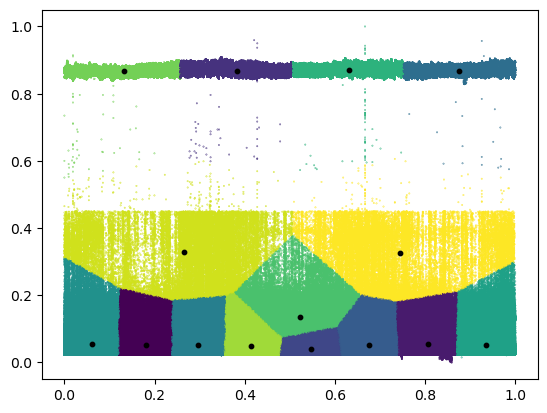

In [21]:
plt.figure()
plt.scatter(
    df_scaled.timestamp, 
    df_scaled.value, 
    s = 0.1, # tamaño de los marcadores
    c = kmeans.labels_
)
plt.scatter(df_centers.x, df_centers.y, s=10, c='k')
plt.show()

### Paralelización

Esto toma tiempo, pues a más elementos y grupos, más tiempo de ejecución

In [22]:
# inertia = []
# for n_clusters in range(2, 15):
#     kmeans = KMeans(n_clusters=n_clusters).fit(df_scaled)
#     inertia.append(kmeans.inertia_ / n_clusters)

Pero se puede paralelizar.

In [23]:
# https://coderzcolumn.com/tutorials/python/joblib-parallel-processing-in-python
from joblib import Parallel, delayed, effective_n_jobs

In [24]:
# Número de procesadores para usar
effective_n_jobs()

16

In [25]:
# Ejemplo mínimo
import math

In [26]:
%%time 
Parallel(n_jobs = 2)(
    delayed(math.factorial)(i) # (función)(parametro)
    for i in range(10000)
)
print()


CPU times: total: 62.5 ms
Wall time: 4.47 s


In [27]:
%%time 
Parallel(n_jobs=8)(delayed(math.factorial)(i) for i in range(10000))
print()


CPU times: total: 62.5 ms
Wall time: 1.64 s


In [28]:
# Ahora sí con kmeans
def f_kmeans(n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, n_init = 'auto').fit(df_scaled)
    return kmeans.inertia_ / n_clusters

In [29]:
%%time
inertia = Parallel(n_jobs = 2, prefer="threads")(delayed(f_kmeans)(cn) for cn in range(2, 15))

CPU times: total: 39.1 s
Wall time: 18.4 s


In [30]:
%%time
inertia = Parallel(n_jobs = 8, prefer="threads")(delayed(f_kmeans)(cn) for cn in range(2, 15))

CPU times: total: 1min 4s
Wall time: 13.1 s


### Seleccionar número de grupos

In [31]:
df_inertias = pd.DataFrame({'n_clusters': range(2, 15), 'inertia': inertia})
df_inertias

,n_clusters,inertia
0,2,130380.671564
1,3,32126.954738
2,4,19670.847636
3,5,9102.431852
4,6,5299.480427
5,7,4061.351781
6,8,2876.128532
7,9,2182.595382
8,10,1715.646241
9,11,1498.714413


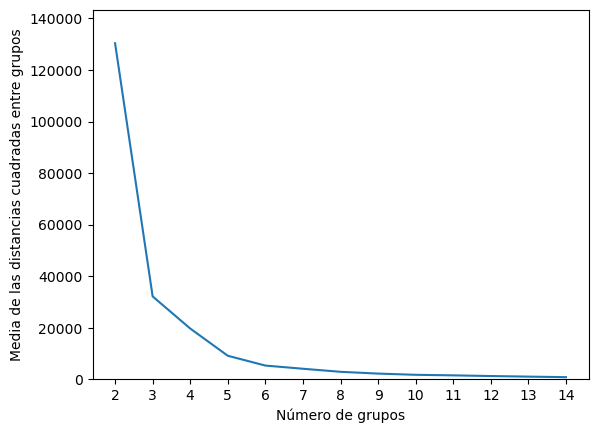

In [32]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.ylim((0, 1.1 * df_inertias.inertia.max()))
plt.xticks(range(2, 15))
plt.show()

Para calcular el número de grupos por el método del codo, se calculan las distancias entre cada punto y la recta que va del primero al último. Generalmente, la primer distancia mayor corresponde con el mejor número de grupos.

In [33]:
# https://stackoverflow.com/a/21566184/3113008
# De aquí sacamos la ecuación de la recta entre el punto primero y último

from numpy import ones,vstack
from numpy.linalg import lstsq
points = [
    (df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
    (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

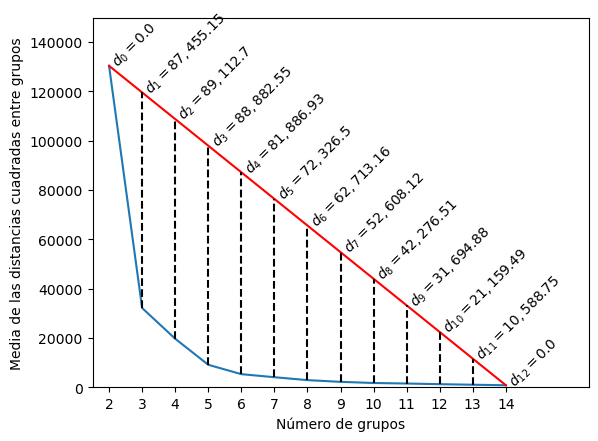

In [34]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c='r')
for i, r in df_inertias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 16.5))
plt.ylim((0, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(2, 15))
plt.show()

La mayor distancia se obtiene con $k = 4$, por lo que se toma como mejor número de $k$ por el método del codo.

In [35]:
kmeans = KMeans(n_clusters=4, n_init = 'auto').fit(df_scaled)

También se puede usar el método **Silhouette** (pero es más pesado que el método del codo 😓) 

$$
\text{s} = \frac{a-b}{\max(a,b)}
$$ 

donde $a$ es la distancia media entre los puntos dentro del grupo más cercano y $b$ es la distancia media entre cada punto respecto a todos los demás que están en los otros grupos a los que no pertenece. Los resultados obtenidos van de $1$ (las medias parten de grupos bien diferenciados) a $-1$ (las medias de los grupos indican que sus elementos), pasando por $0$ (distancias entre grupos se considera no significativa).

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(df_scaled, kmeans.labels_, metric = 'euclidean', sample_size = len(df_scaled) // 30, n_jobs = 8)

KeyboardInterrupt: 

## Agrupamiento jerárquico

Este tipo de agrupamiento parte de $n \in \mathbb{N}$ datos con $p$ parámetros entre los cuales se pueden medir distancias $d_{i,j}, i, j \in n, i \neq j$ para formar $N \in \mathbb{N}$ grupos $A, B, C, \ldots$ con distancias $D_{A,B}; D_{A,C}; D_{B,C}; \ldots$ usadas para medir la disimilitud entre grupos. Cabe señalar que existen [diferentes distancias entre elementos y grupos](https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage) que se pueden usar.

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
clustering = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
clustering = clustering.fit(df_scaled.iloc[:10000])

Estos resultados se pueden mostrar en dendogramas.

In [40]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

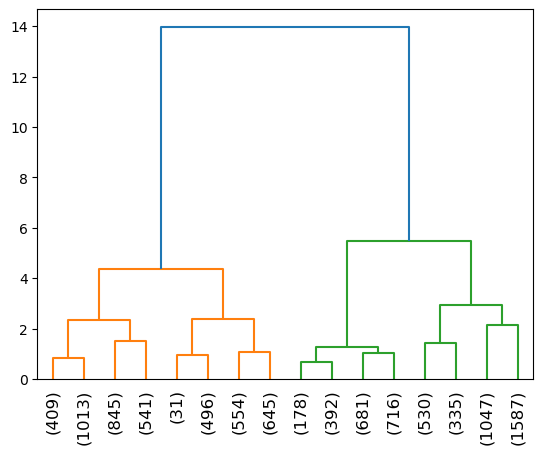

In [41]:
plt.figure()
plot_dendrogram(clustering, truncate_mode = "level", p = 3)
plt.xticks(rotation = 90)
# plt.savefig('dendogram.pdf')
plt.show()

## Tarea en clase (2 puntos)

- Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son *Affinity Propagation*, BIRCH, DBSCAN, *Mean Shift*, *Nearest Neighbors*, OPTICS, *Spectral Clustering*, TSNE, entre otros
- Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste

## Tarea (8 puntos)

- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo
- Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

## Recursos

- https://fesan818181.medium.com/unsupervised-learning-algorithms-explanaition-and-simple-code-b7f695a9e2cd
- https://machinelearningmastery.com/clustering-algorithms-with-python/
- https://medium.com/imagescv/top-8-most-important-unsupervised-machine-learning-algorithms-with-python-code-references-1222393b5077
- https://builtin.com/data-science/unsupervised-learning-python
- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
- https://towardsdatascience.com/how-many-clusters-6b3f220f0ef5
- https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2
- https://github.com/wwwjk366/gower